In [55]:
#Overdose Death Rate Analysis in the United States

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [94]:
#Load the data
os.chdir("C:\\Users\\aride\\OneDrive - ccac.edu\\Spring 2025\\HIT 216")
df = pd.read_csv(r'C:\\Users\\aride\\OneDrive - ccac.edu\\Spring 2025\\HIT 216\\Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv')

In [61]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [63]:
#Drop rows with missing estimates
print("Missing values before:", df['ESTIMATE'].isna().sum())
df = df.dropna(subset=['ESTIMATE'])
print("Missing values after:", df['ESTIMATE'].isna().sum())

Missing values before: 0
Missing values after: 0


In [65]:
#See the values after dropping the empty columns
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [67]:
#Confirming all null values were removed
df['ESTIMATE'].isna().sum()

0

In [69]:
#Convert YEAR to integer to make sure they work in the models
df['YEAR'] = df['YEAR'].astype(int)

In [71]:
#Make models look cleaner by using total population rather than splitting the demographics
df_total = df[df['STUB_NAME'] == 'Total']

In [73]:
#Gives a summary of the data instead of calculating these numbers individually
print(df_total['ESTIMATE'].describe())

count    240.000000
mean       4.566250
std        4.852673
min        0.300000
25%        1.000000
50%        2.800000
75%        6.450000
max       21.700000
Name: ESTIMATE, dtype: float64


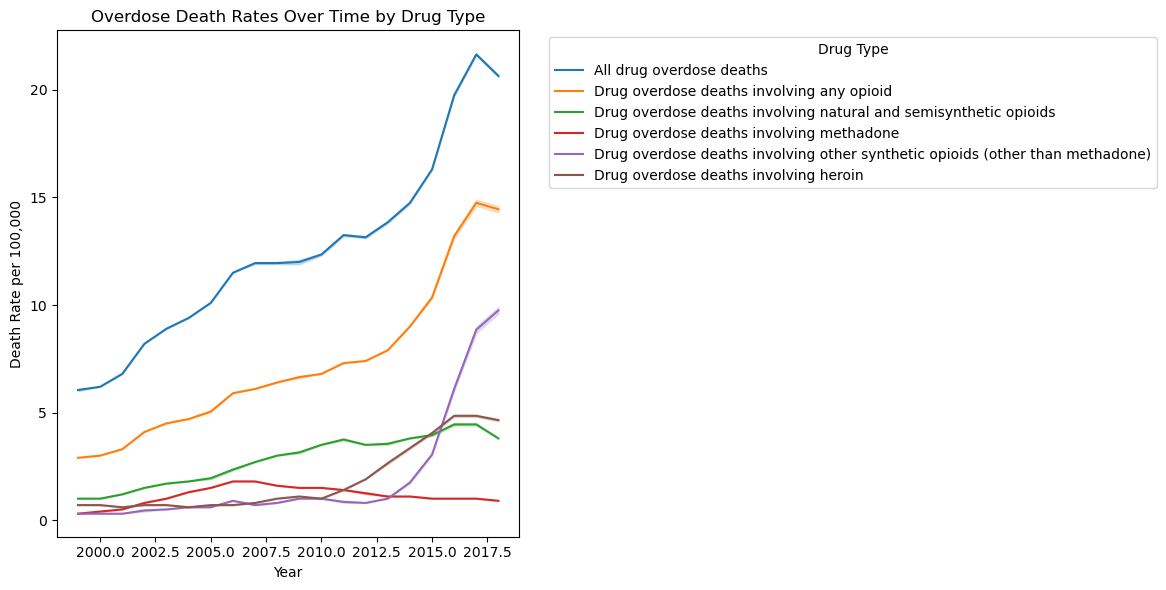

In [75]:
#Trend over time by drug type
plt.figure(figsize=(12,6))
sns.lineplot(data=df_total, x='YEAR', y='ESTIMATE', hue='PANEL')
plt.title("Overdose Death Rates Over Time by Drug Type")
plt.ylabel("Death Rate per 100,000")
plt.xlabel("Year")
plt.legend(title='Drug Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

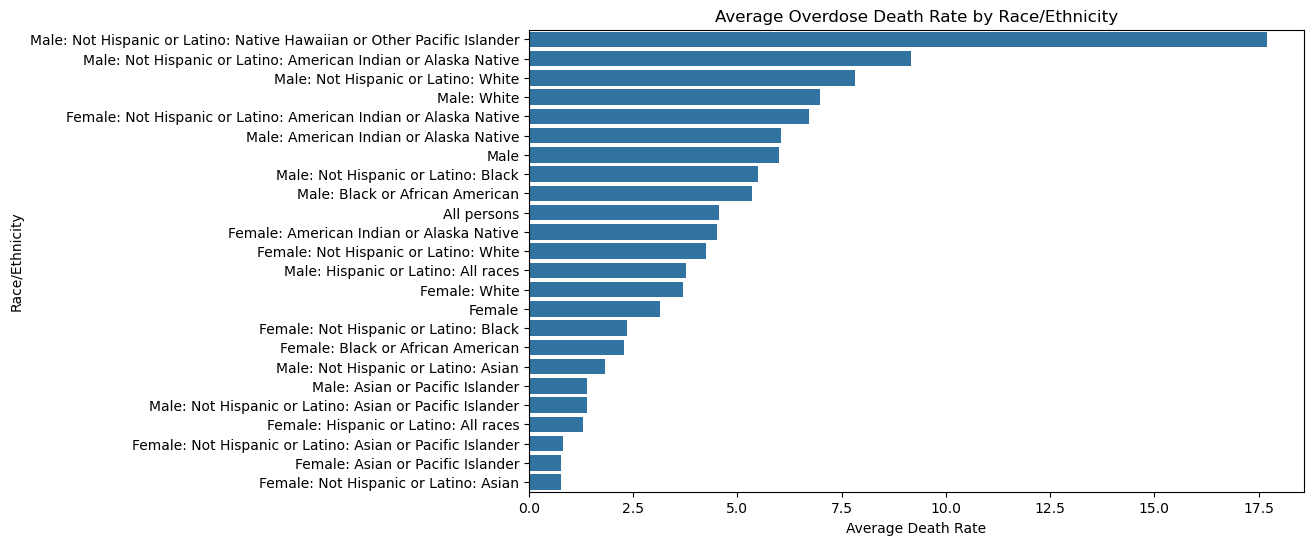

In [76]:
#Horizontal bar chart to show average death rate by race/ethnicity - helps to clearly see which race/ethnicity has higher or lower death rates
df_race = df[df['AGE'] == 'All ages']
race_grouped = df_race.groupby('STUB_LABEL')['ESTIMATE'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=race_grouped.values, y=race_grouped.index)
plt.title("Average Overdose Death Rate by Race/Ethnicity")
plt.xlabel("Average Death Rate")
plt.ylabel("Race/Ethnicity")
plt.show()

In [77]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
#Predicting death rate based on year
X = df_total[['YEAR']]
y = df_total['ESTIMATE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [80]:
from sklearn.metrics import r2_score, root_mean_squared_error

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R^2 Score: 0.12865743252458017
RMSE: 5.247472186950372


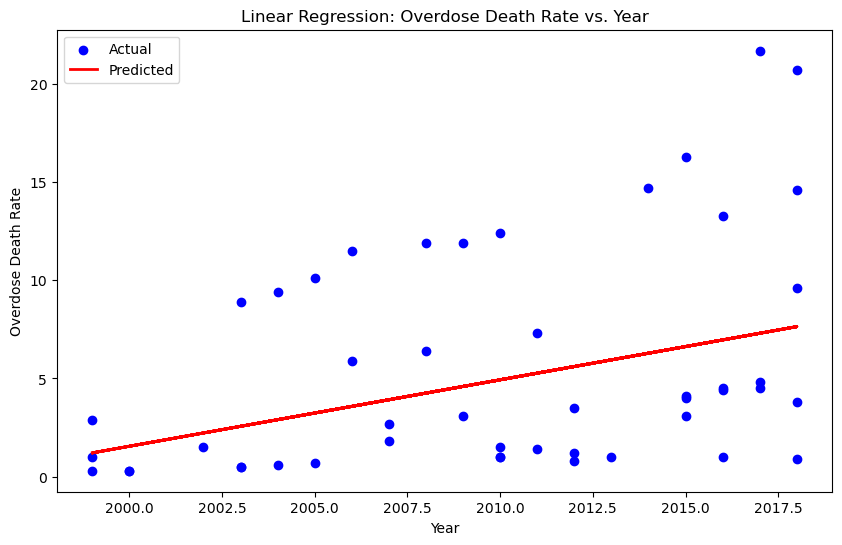

In [92]:
#Seeing the line regression as a model - the graph shows a general trend in the increase of overdose death rates over time but doesn't account for other factors like race, or drug types and how they influence overdose rates.

# Visualize regression line
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Linear Regression: Overdose Death Rate vs. Year")
plt.xlabel("Year")
plt.ylabel("Overdose Death Rate")
plt.legend()
plt.show()